In [1]:
# use the R to read the csv file
library(readr)
DF1 <- read_csv("adult_training.csv" )

print(DF1)

Parsed with column specification:
cols(
  age = col_double(),
  workclass = col_character(),
  education = col_double(),
  maritalStatus = col_character(),
  occupation = col_character(),
  sex = col_character(),
  capitalGain = col_double(),
  capitalLoss = col_double(),
  income = col_character()
)


# A tibble: 14,797 x 9
     age workclass education maritalStatus occupation sex   capitalGain
   <dbl> <chr>         <dbl> <chr>         <chr>      <chr>       <dbl>
 1    50 Self-emp…        13 Married-civ-… Exec-mana… Male            0
 2    38 Private           9 Divorced      Handlers-… Male            0
 3    49 Private           5 Married-spou… Other-ser… Fema…           0
 4    52 Self-emp…         9 Married-civ-… Exec-mana… Male            0
 5    31 Private          14 Never-married Prof-spec… Fema…       14084
 6    40 Private          11 Married-civ-… Craft-rep… Male            0
 7    38 Private           7 Married-civ-… Sales      Male            0
 8    43 Private           7 Married-civ-… Transport… Male            0
 9    54 ?                10 Married-civ-… ?          Male            0
10    39 Private           9 Divorced      Exec-mana… Male            0
# … with 14,787 more rows, and 2 more variables: capitalLoss <dbl>,
#   income <chr>


In [2]:
# create a contengcy table for workclass and sex

r_crosstable <- table(DF1$workclass, DF1$sex)

ftable(r_crosstable)

                  Female Male
                             
?                    377  452
Federal-gov          149  305
Local-gov            377  592
Never-worked           1    4
Private             3574 6707
Self-emp-inc          54  444
Self-emp-not-inc     178  992
State-gov            201  385
Without-pay            1    4

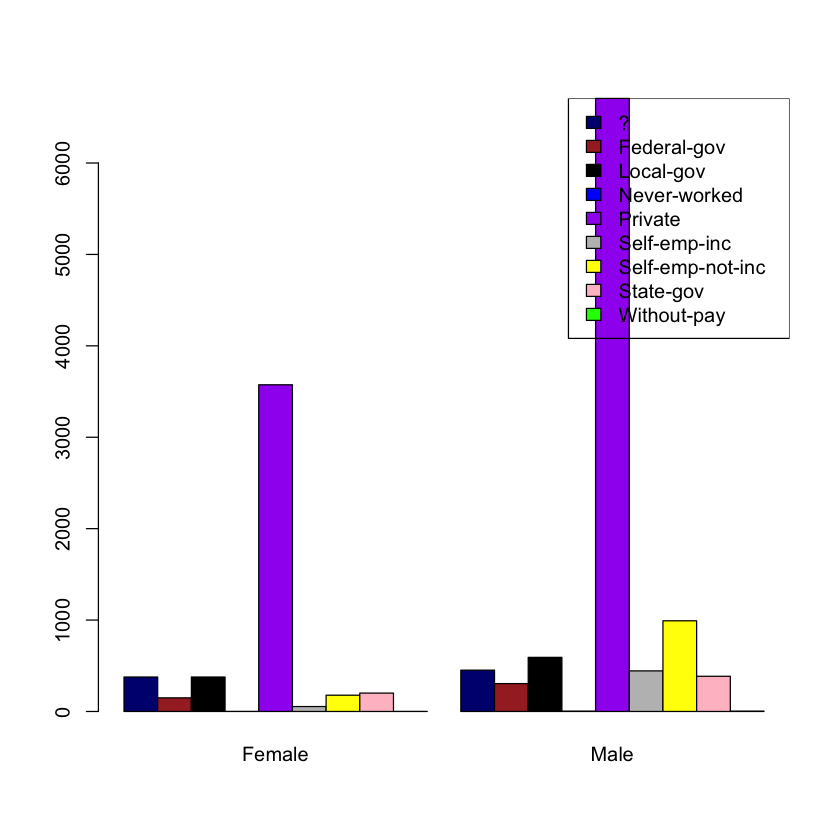

In [7]:
# use barplot showing the table

colors <- c("navy", "brown","black","blue","purple", "gray", "yellow","pink", "green")

barplot(r_crosstable, col = colors, beside = TRUE)
legend("topright", legend = c("?", "Federal-gov","Local-gov", "Never-worked", "Private", "Self-emp-inc", "Self-emp-not-inc","State-gov","Without-pay"), fill = colors)

In [8]:
#Create another contengency table for sex and marital status

r_crosstable2 <- table(DF1$sex, DF1$maritalStatus)

ftable(r_crosstable2)

        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female      1219                 7                761                    95          2160       290     380
Male         795                 4               6010                   104          2717       182      73

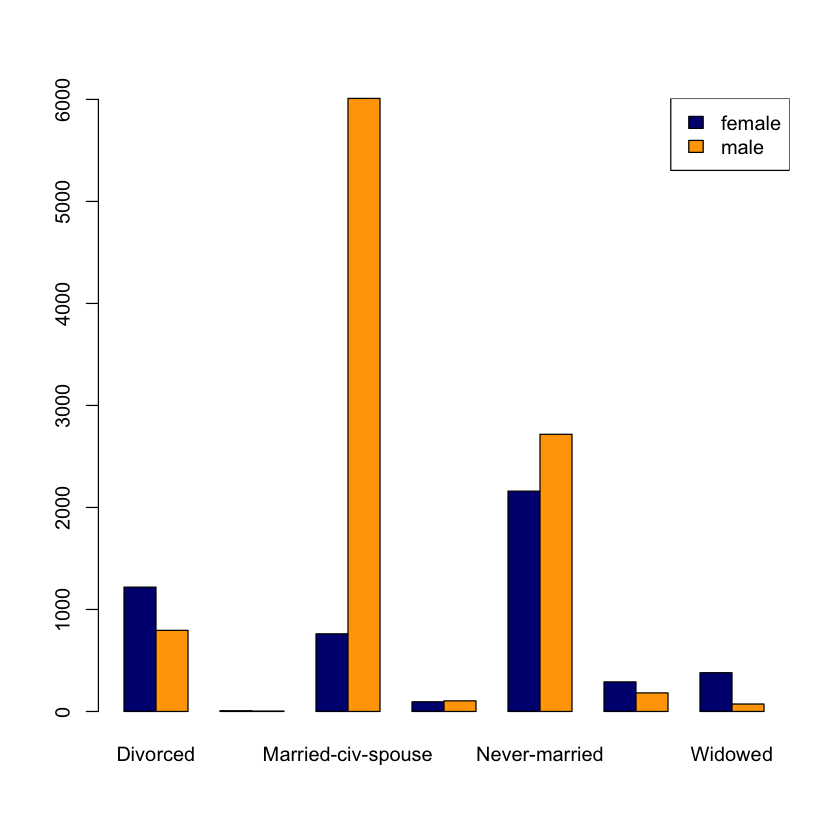

In [9]:
# create a barplot to show the sex and marital status

# navy reprsents female, and orange represents male

colors <- c("navy", "orange")

barplot(r_crosstable2, col = colors, beside = TRUE)
legend("topright", legend = c("female", "male"), fill = colors)

In [10]:
# create a new dataFrame and filter the age 40
library(dplyr)
adultOver40 <- DF1 %>% filter (age > 40)


print(adultOver40)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# A tibble: 6,144 x 9
     age workclass education maritalStatus occupation sex   capitalGain
   <dbl> <chr>         <dbl> <chr>         <chr>      <chr>       <dbl>
 1    50 Self-emp…        13 Married-civ-… Exec-mana… Male            0
 2    49 Private           5 Married-spou… Other-ser… Fema…           0
 3    52 Self-emp…         9 Married-civ-… Exec-mana… Male            0
 4    43 Private           7 Married-civ-… Transport… Male            0
 5    54 ?                10 Married-civ-… ?          Male            0
 6    44 Private          14 Divorced      Exec-mana… Fema…           0
 7    50 Federal-…        13 Divorced      Exec-mana… Male            0
 8    47 Self-emp…         9 Divorced      Exec-mana… Male            0
 9    43 Private          10 Married-civ-… Tech-supp… Male            0
10    53 Private           9 Married-civ-… Adm-cleri… Fema…           0
# … with 6,134 more rows, and 2 more variables: capitalLoss <dbl>, income <chr>


In [13]:
#Create another contengency table for sex and marital status

r_crosstable3 <- table(adultOver40$sex, adultOver40$maritalStatus)

ftable(r_crosstable3)

        Divorced Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                         
Female       720                305                    38           256       133     354
Male         448               3383                    47           315        74      71

In [14]:
# standize the education
adultOver40$scaled_education <- scale(x = adultOver40$education)

summary(adultOver40$scaled_education)

       V1          
 Min.   :-3.16912  
 1st Qu.:-0.39788  
 Median :-0.05148  
 Mean   : 0.00000  
 3rd Qu.: 0.98774  
 Max.   : 2.02695  

In [16]:
# use the three sigma rule to determine if it has outliers
three_sigma_rule <- (adultOver40$scaled_education < -3 | adultOver40$scaled_education > 3 )

cat("There are", sum(three_sigma_rule), "outliers \n\n")

There are 11 outliers 



In [17]:
# standdize the age
adultOver40$scaled_age <- scale(x = adultOver40$age)

summary(adultOver40$scaled_age)

       V1         
 Min.   :-1.2225  
 1st Qu.:-0.7810  
 Median :-0.2291  
 Mean   : 0.0000  
 3rd Qu.: 0.5436  
 Max.   : 4.1860  

In [18]:
# use the three sigma rule to determine if it has outliers

three_sigma_rule2 <- (adultOver40$scaled_age < -3 |adultOver40$scaled_age > 3 )

cat ("There are", sum(three_sigma_rule2), "outliers \n\n")

There are 60 outliers 



In [22]:
# create a DF and limit the age above 80
age80 <- adultOver40[adultOver40$age >= 80,]
age80



age,workclass,education,maritalStatus,occupation,sex,capitalGain,capitalLoss,income,scaled_education,scaled_age
90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,-0.3978803,4.186015
80,?,9,Widowed,?,Male,0,0,<=50K,-0.3978803,3.082243
90,Private,9,Never-married,Other-service,Female,0,0,<=50K,-0.3978803,4.186015
88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,1.6805469,3.965261
90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,0.9877378,4.186015
90,Private,10,Never-married,Other-service,Male,0,0,<=50K,-0.0514758,4.186015
82,?,4,Widowed,?,Male,0,0,<=50K,-2.1299030,3.302998
90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K,-1.7834985,4.186015
80,Private,14,Widowed,Prof-specialty,Female,0,0,<=50K,1.3341424,3.082243
90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K,1.3341424,4.186015


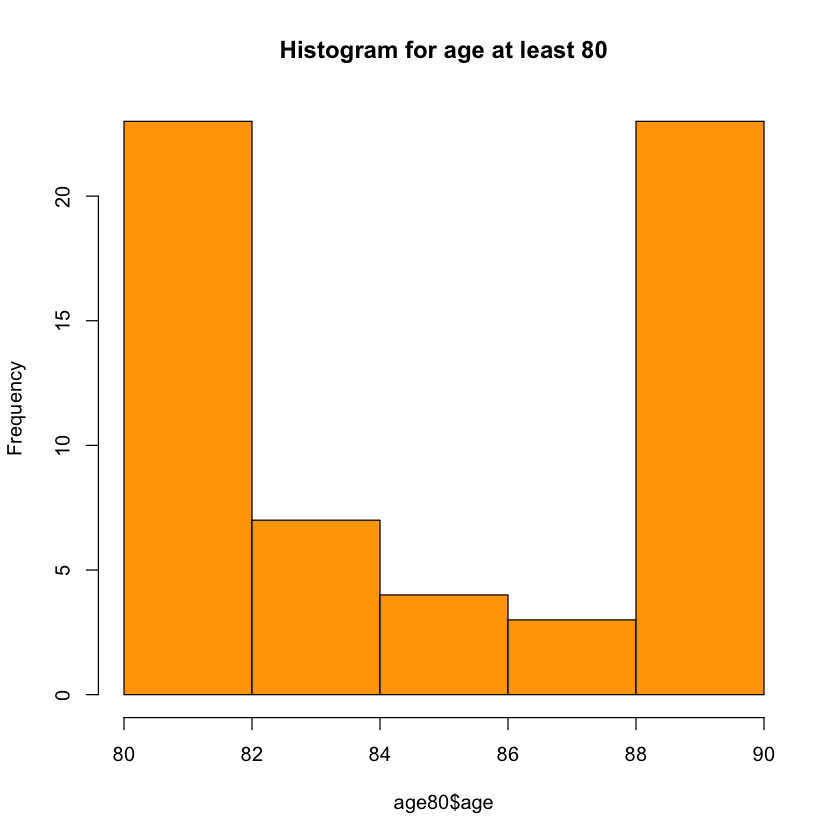

In [33]:
# create a hist for age

# according to the hist, we can see the extreme outlier is 90 for Q7


hist(age80$age, main="Histogram for age at least 80",col="orange")

In [34]:
# according to the hist, we can see the extreme outlier is 90 for Q7

      age         workclass           education      maritalStatus     
 Min.   :80.00   Length:60          Min.   : 2.000   Length:60         
 1st Qu.:81.75   Class :character   1st Qu.: 6.750   Class :character  
 Median :84.50   Mode  :character   Median : 9.000   Mode  :character  
 Mean   :85.35                      Mean   : 9.183                     
 3rd Qu.:90.00                      3rd Qu.:13.000                     
 Max.   :90.00                      Max.   :16.000                     
  occupation            sex             capitalGain     capitalLoss  
 Length:60          Length:60          Min.   :    0   Min.   :   0  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0  
 Mode  :character   Mode  :character   Median :    0   Median :   0  
                                       Mean   :  687   Mean   : 149  
                                       3rd Qu.:    0   3rd Qu.:   0  
                                       Max.   :20051   Max.   :4356  
    in